## 分類 Classification  
### 2次元入力2クラス分類の場合  



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
np.random.seed(seed = 1)
N = 100
K = 3
T3 = np.zeros((N,3), dtype=np.uint8)
T2 = np.zeros((N,2), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 分布の分散
Pi = np.array([0.4, 0.8, 1])
for n in range(N):
    # wk:0～1 までの一様分布乱数
    # クラス0　　wk < Pi[0]
    # クラス1　　wk >= Pi[0] && wk < Pi[1]
    # クラス2　　wk >= Pi[1] && wk < Pi[2]
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])

# 1-of-K符号化法ｓ
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

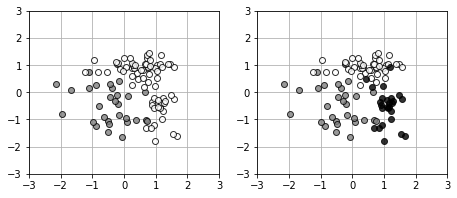

In [30]:
# データ表示
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5,  .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], ls = 'none', mec='black', marker='o', c=c[k], alpha=0.8)
    plt.grid(True)

plt.figure(figsize=(7.5, 3))
plt.subplot(1,2,1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.show()

ロジスティック回帰  
$$
y = σ(a) = \frac{1}{1 + \exp(-a)}
$$  

$$
a = w_0x_0 + w_1x_1 + w_2
$$

In [59]:
# ロジスティック回帰モデル
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0]*x0 + w[1]*x1 + w[2])))
    return y

<IPython.core.display.Javascript object>


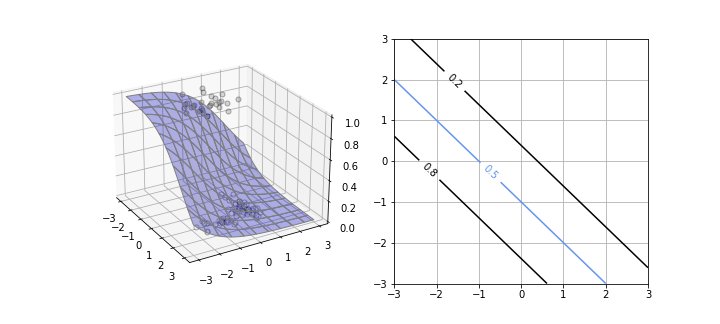

In [75]:
# 3d表示
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range0[0], X_range0[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y,  color='blue', ec='gray', rstride=5, cstride=5, alpha=0.3)

def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker='o', 
                color=c[i], mec='black', ls='none', markersize=5, alpha=0.3)
    ax.view_init(elev=25, azim=-30)

def show_contour_logistic2(w):
    xn = 30
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range0[0], X_range0[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8), colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%.1f', fontsize=10)
    plt.grid(True)

plt.figure(figsize=(10, 4.5))
Ax = plt.subplot(1,2,1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

plt.subplot(1,2,2)
show_contour_logistic2(W)

plt.show()

## 平均交差エントロピー誤差関数  
$$
E(\boldsymbol{w}) 
= - \frac{1}{N} \log P(\boldsymbol{T}|\boldsymbol{X}) 
= - \frac{1}{N} \sum_{n=0}^{N-1}\{t_n \log y_n + (1-t_n) \log(1-y_n)\}
$$